Coefficients:  [[ 9.47199378  7.987732   10.07505448]]
Intercept:  [61.30492267]
Mean absolute error: 17.76
Residual sum of squares (MSE): 613.14
R2-score: 0.84
Variance score: 0.85


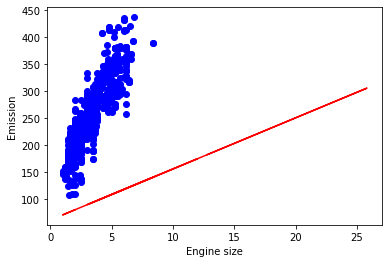

In [2]:
# Multiple Linear regression - dependent variable vs multiple independent variables


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv("FuelConsumption.csv")
msk = np.random.rand(len(df)) < 0.8  #select random rows
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

train = cdf[msk]
test = cdf[~msk]

# Multiple regression  model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'] ])  # more independent variables
train_y = np.asanyarray(train[['CO2EMISSIONS']]) # 1 dependent variable
regr.fit(train_x, train_y) # model design with training data
# The coefficients -the parameters of the fit line
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') # data plot
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') # plot points on trainx data :  y = m*x+c
plt.xlabel("Engine size")
plt.ylabel("Emission")


#predicts the test data
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])   # asanyarray : converts List into array
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x) # through regression model predicts the test data


# check Error and accuracy using 3 paramters -
# (1) Mean absolute error
# (2) Mean squared error
# (3) Rsquared accuracy measure - how close the data are to the fitted regression line.
#     The higher the R-squared, the better the model fits your data

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))